# Cement Strength Prediction Model

## Problem Statement:-
- We have Cement Strength Prediction Dataset, We have Total 1030 Rows and 9 Columns.
- Out of 9 Columns, The Prediction Column [Target Variable] is Strength. Rest Other Feature Columns are Treated as Independent Variable.

- From the Research Study we Found that, Age is Important Feature to Predict The Target Variable .i.e. Strength.
                                                           Figure 01
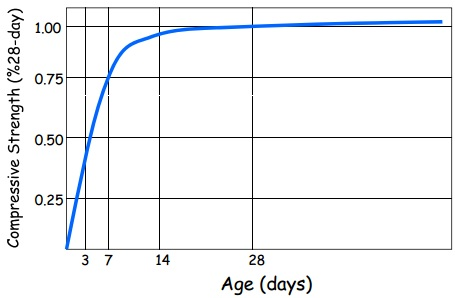

## Import Python Libraries

In [1]:
import pandas as pd
import numpy as np

# To Filter Warnings Messanges
import warnings
warnings.simplefilter('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Stats Model Library
from collections import OrderedDict
import scipy.stats as sci

# Machine Learning Model Building Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [2]:
# Importing Dataset

cementdata = pd.read_excel('Capstone Project.xlsx')
cementdata

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


## Check for Null Value

In [3]:
cementdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Obsrvation --->
 -  No Null Values Present in the Dataset.
 -  we have total 1030 Rows and 9 Columns.
 - Except age,the rest data types are float.
 -  We have Target variable as 'age' and rest other variables are independent Variables.

In [4]:
cementdata.describe(percentiles=[0.25,0.50,0.75,1])

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
100%,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Analysis from descriptive statistics:

- There might be skewness in the data in some columns( after looking at the mean and median but will need to find the skewness magnitude)
- There might be chances for outlier if we compare quartiles for some of the columns(like age, cement, slag, superplastics, strength in the upper whisker reason)
- Since MINIMUM and Q1 value is same for slag,ash,superplastic we do not have outliers in the lower whisker region.
- The range of value in age is from 1 to 365.

## Custom EDA Summary/ Descriptive Statistics

In [5]:
def custom_summary(my_df):
    
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                'Feature Name': col ,
                'Count': my_df[col].count() ,
                'Minimum': my_df[col].min() ,
                'Quartile1': my_df[col].quantile(0.25) ,
                'Quartile2': my_df[col].quantile(0.5) ,
                'Quartile3': my_df[col].quantile(0.75) ,
                'Mean': my_df[col].mean() ,
                'Maximum': my_df[col].max() ,
                'Variance': round(my_df[col].var(),2) ,
                'Standard Deviation': my_df[col].std() ,
                'Skewness': my_df[col].skew() ,
                'Kurtosis': my_df[col].kurt() 
            })
            result.append(stats)
            
    result_df = pd.DataFrame(result)      
    
    #skewness type
    
    skewness_label = []
    for i in result_df['Skewness']:
        if i <= -1:
            skewness_label.append('Highly Negatively skewed')
        elif i >-1 and i <= -0.5:
            skewness_label.append('Moderately Negatively skewed')
        elif i > -0.5 and i <= 0:
            skewness_label.append('Fairly Negatively skewed')
        elif i > 0 and i <= -0.5:
            skewness_label.append('Fairly Positively skewed')
        elif i > -0.5 and i< 1:
            skewness_label.append('Moderately Positively skewed')
        elif i>=1:
            skewness_label.append('Highly Positively skewed')
    result_df['Skewness Comment'] = skewness_label 
    
    #Kurtosis type:
    
    kurtosis_label = []
    for i in result_df['Kurtosis']:
        if i >= 1:
            kurtosis_label.append('Leptokurtic Curve')
        elif i<= -1:
            kurtosis_label.append('Platykurtic Curve')
        else:
            kurtosis_label.append('Mesokurtic Curve')
    result_df['Kurtosis Comment'] = kurtosis_label
    
    #Outlier type
    
    outlier_label = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.5)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3 - Q1
            LW = Q1 - IQR * 1.5
            UW = Q3 + IQR * 1.5
            if len(my_df[(my_df[col] < LW) | (my_df[col] > UW)]) > 0:
                outlier_label.append('Has an outlier')
            else:
                outlier_label.append('No outliers')
    result_df['Outlier Comment'] = outlier_label
            
    return result_df

In [6]:
stats = custom_summary(cementdata)
stats

,Feature Name,Count,Minimum,Quartile1,Quartile2,Quartile3,Mean,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skewness Comment,Kurtosis Comment,Outlier Comment
0,cement,1030,102.00,192.375,272.900,350.000,281.167864,540.0,10921.58,104.506364,0.509481,-0.520652,Moderately Positively skewed,Mesokurtic Curve,No outliers
1,slag,1030,0.00,0.000,22.000,142.950,73.895825,359.4,7444.12,86.279342,0.800717,-0.508175,Moderately Positively skewed,Mesokurtic Curve,Has an outlier
2,ash,1030,0.00,0.000,0.000,118.300,54.188350,200.1,4095.62,63.997004,0.537354,-1.328746,Moderately Positively skewed,Platykurtic Curve,No outliers
3,water,1030,121.80,164.900,185.000,192.000,181.567282,247.0,456.00,21.354219,0.074628,0.122082,Moderately Positively skewed,Mesokurtic Curve,Has an outlier
4,superplastic,1030,0.00,0.000,6.400,10.200,6.204660,32.2,35.69,5.973841,0.907203,1.411269,Moderately Positively skewed,Leptokurtic Curve,Has an outlier
5,coarseagg,1030,801.00,932.000,968.000,1029.400,972.918932,1145.0,6045.68,77.753954,-0.040220,-0.599016,Fairly Negatively skewed,Mesokurtic Curve,No outliers
6,fineagg,1030,594.00,730.950,779.500,824.000,773.580485,992.6,6428.19,80.175980,-0.253010,-0.102177,Fairly Negatively skewed,Mesokurtic Curve,Has an outlier
7,age,1030,1.00,7.000,28.000,56.000,45.662136,365.0,3990.44,63.169912,3.269177,12.168989,Highly Positively skewed,Leptokurtic Curve,Has an outlier
8,strength,1030,2.33,23.710,34.445,46.135,35.817961,82.6,279.08,16.705742,0.416977,-0.313725,Moderately Positively skewed,Mesokurtic Curve,Has an outlier


# Note:-
    
Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution.

- Distributions with medium kurtosis (medium tails) are mesokurtic.
- Distributions with low kurtosis (thin tails) are platykurtic.
- Distributions with high kurtosis (fat tails) are leptokurtic.

Tails are the tapering ends on either side of a distribution. They represent the probability or frequency of values that are extremely high or low compared to the mean. In other words, tails represent how often outliers occur.

# Observation from Descriptive Statistics

- Cement has a Mesokurtic curve which implies the data points are moderate in distance from the mean so mean and SD are moderate. 
- Slag has a Mesokurtic curve which implies the data points are moderate in distance from the mean so mean and SD are moderate.
- Ash has a Platykurtic curve which implies the mean does not represent the whole data covered, so the SD is high.
- Water has a Mesokurtic curve which implies the data points are moderate in distance from the mean so mean and SD are moderate.
- Superplastic has a Leptokurtic curve which implies that the data points are closer to the mean.

# Performing Outlier Treatment

In [17]:
def replace_outlier(my_df,col,method='Quartile',strategy='Median'):
    col_data=my_df[col] #method means how you are supposed to detect outliers
    
    if method=='Quartile':
        #using quartiles to calculate IQR
        q1=col_data.quantile(0.25)
        q2=col_data.quantile(0.5)
        q3=col_data.quantile(0.75)
        
        
        IQR=q3-q1
        LW=q1-(1.5*IQR)
        UW=q3+(1.5*IQR)
        
        
    elif method=='Standard Deviation':  #we are using emperical method here
        mean=col_data.mean()
        std=col_data.std()
        LW=mean-(2*std)
        UW=mean+(2*std)
    
    else:
        print('Pass the correct method')
    #now printing all the outliers
    
    
    outliers=my_df.loc[(col_data<LW) | (col_data>UW)]
    outliers_density= round(len(outliers)/len(my_df),2)
    if len(outliers)==0:
        print(f'Feature {col} does not have any outliers.')
        print('\n')
    else:
        print(f'Feature {col} has outliers.')
        print('\n')
        print(f'Total number of outliers in {col} are {len(outliers)} ')
        print('\n')
        print(f'Outlier percentage in {col} is {outliers_density}%')
        print('\n')
        display(my_df[(col_data < LW) | (col_data > UW)])
    
    #replacing outlier
    if strategy == 'Median':
        my_df.loc[(col_data < LW) | (col_data > UW),col] = q2
    
    elif strategy == 'Mean':
        my_df.loc[(col_data < LW) | (col_data > UW),col] = q3
    
    else:
        print('Pass a correct strategy')
    
    return my_df

In [19]:
for col in cementdata.columns:
    replace_outlier(cementdata,col,method='Quartile',strategy='Median')

Feature cement does not have any outliers.


Feature slag does not have any outliers.


Feature ash does not have any outliers.


Feature water does not have any outliers.


Feature superplastic does not have any outliers.


Feature coarseagg does not have any outliers.


Feature fineagg has outliers.


Total number of outliers in fineagg are 30 


Outlier percentage in fineagg is 0.03%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
13,237.5,237.5,0.0,228.0,0.0,932.0,594.0,7,26.26
16,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,30.08
31,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,28,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,36.25
142,332.5,142.5,0.0,228.0,0.0,932.0,594.0,90,37.72
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,41.15
241,427.5,47.5,0.0,228.0,0.0,932.0,594.0,90,41.54
283,475.0,0.0,0.0,228.0,0.0,932.0,594.0,90,42.23


Feature age has outliers.


Total number of outliers in age are 131 


Outlier percentage in age is 0.13%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
15,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,100,49.97
26,304.0,76.0,0.0,228.0,0.0,932.0,670.0,90,49.19
27,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
34,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,90,37.91
...,...,...,...,...,...,...,...,...,...
984,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,100,53.66
991,401.8,94.7,0.0,147.4,11.4,946.8,852.1,91,75.50
1000,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,100,37.96
1008,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,100,59.30


Feature strength has outliers.


Total number of outliers in strength are 1 


Outlier percentage in strength is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
506,451.0,0.0,0.0,165.0,11.3,1030.0,745.0,28,78.8


In [21]:
data = pd.DataFrame(replace_outlier(cementdata,col,method='Quartile',strategy='Median'))

Feature strength does not have any outliers.




In [22]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,28,55.06


In [26]:
cementdata

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,28,55.06


In [23]:
data.mean()

cement          281.167864
slag             73.240680
ash              54.188350
water           181.653107
superplastic      5.973592
coarseagg       972.918932
fineagg         777.946019
age              23.757282
strength         35.375596
dtype: float64

In [24]:
cementdata.mean()

cement          281.167864
slag             73.240680
ash              54.188350
water           181.653107
superplastic      5.973592
coarseagg       972.918932
fineagg         777.946019
age              23.757282
strength         35.375596
dtype: float64